---
title: "`plot_tree`의 시각화"
author: "강신성"
date: "2023-11-17"
categories: [tree]
---




> 의사결정나무의 `plot_tree`를 시각화해보자

## 1. 라이브러리 imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.tree
import graphviz

#-#
import warnings
warnings.filterwarnings('ignore')

## 2. 데이터 적합

> 먼저 데이터를 트리로 적합해놓은 뒤 해당 데이터를 통해서 시각화를 해보자.

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/insurance.csv')
df_train

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
## step 1
X = pd.get_dummies(df_train.drop('charges', axis = 1))
y = df_train['charges']

## step 2
predictr = sklearn.tree.DecisionTreeRegressor(max_depth = 3)

## step 3
predictr.fit(X, y)

## step 4 -- pass

DecisionTreeRegressor(max_depth=3)

## 3. `matplotlib` 기반 시각화

### **A. `plot_tree` 기본 시각화**
---




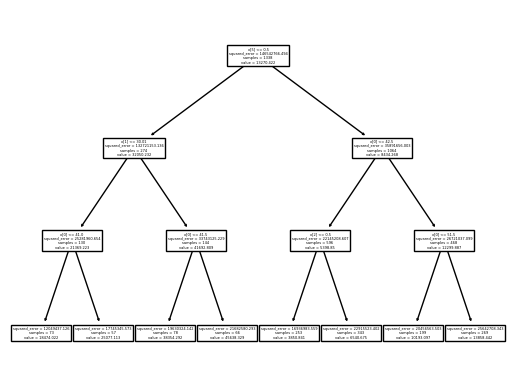

In [5]:
sklearn.tree.plot_tree(predictr);  ## ;을 통해 계산과정 제거 가능

**잘 안보여...**

### **B. `max_depth` 조정**
---




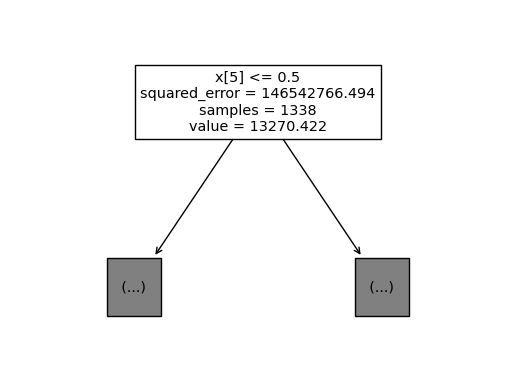

In [6]:
sklearn.tree.plot_tree(
    predictr,
    max_depth = 0
);

> 일단 보이기는 하는데, 위에 하나만 보이겠지...

### **C. 변수이름 추가 | `feature_names = list`**
---




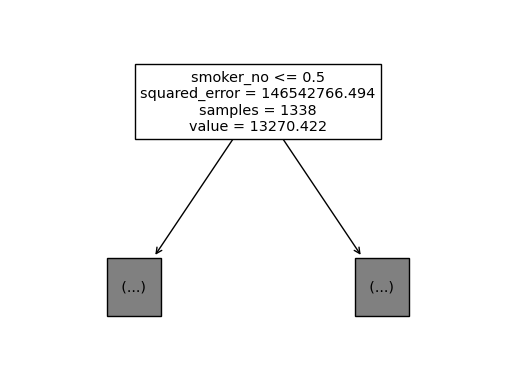

In [7]:
sklearn.tree.plot_tree(
    predictr,
    max_depth = 0,
    feature_names = X.columns.to_list()  ## 교수님은 잘 되시던데 나는 왜 리스트로 넣어야만 할까...
);

> `x[5]`같은 식으로 순서만 표시되던 게, 이름이 표기되었다.

### **D. `fig` 오브젝트**
---




`-` `plt.gcf()`를 통해 `fig`오브젝트로 추출

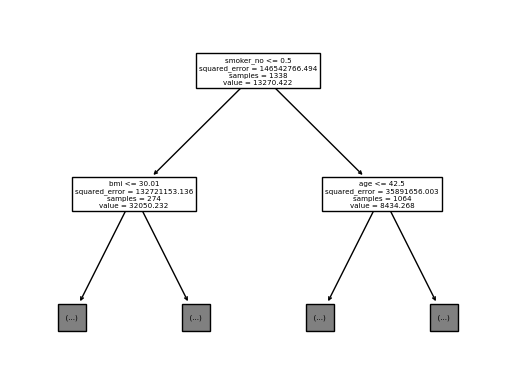

In [8]:
sklearn.tree.plot_tree(
    predictr,
    max_depth = 1,
    feature_names = X.columns.to_list()
);

fig = plt.gcf()

> 이제 이녀석은 `matplotlib`에서 다룰 수 있다.

In [9]:
fig.suptitle("Can we setting title?")

Text(0.5, 0.98, 'Can we setting title?')

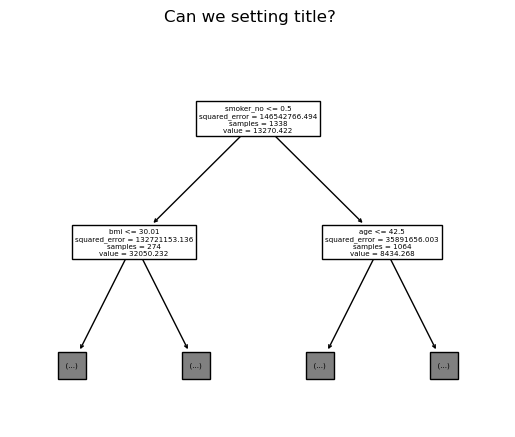

In [10]:
fig

`-` dpi(해상도) 조정

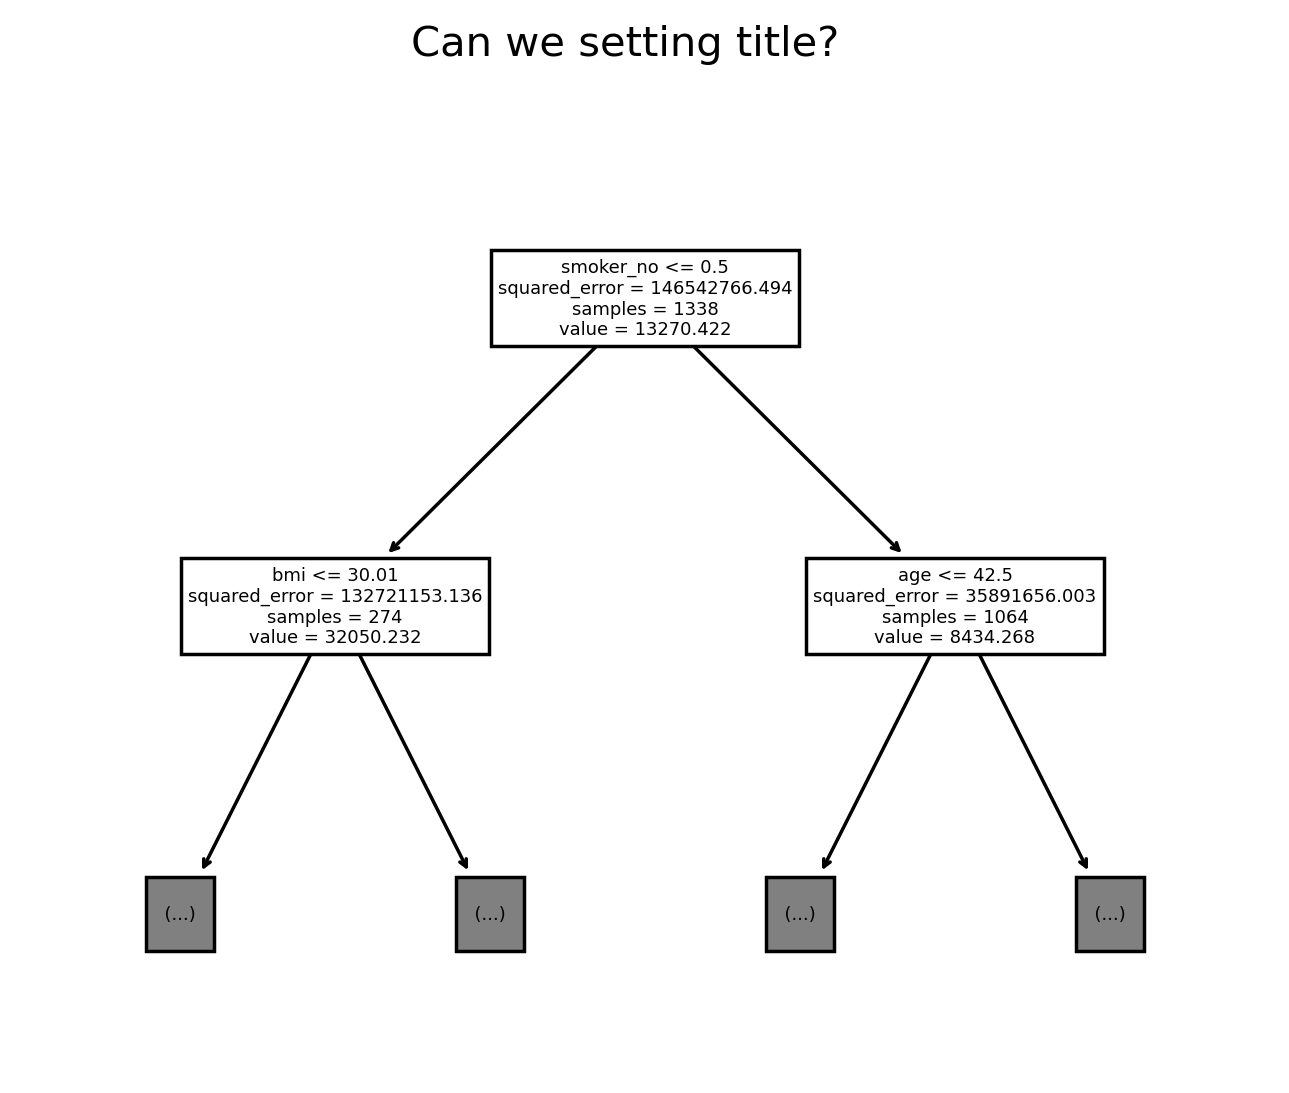

In [11]:
fig.set_dpi(250)
fig

> 아마 해상도를 무쟈게 올리면 되기야 하겠지... 근데 그럼 사진이 엄청나게 커지겠지...

### **E. `matplotlib`의 `ax`에 그리기**
---




`-` `tree`로 적합한 값의 차이 정도와 `plot_tree`를 위아래로 표기하기

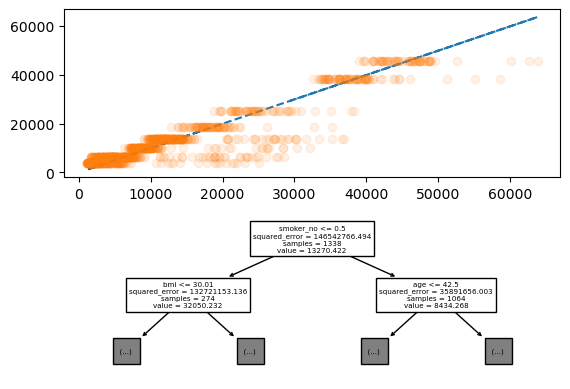

In [12]:
fig = plt.figure()
ax = fig.subplots(2,1)
ax[0].plot(y, y, '--')
ax[0].plot(y, predictr.predict(X), 'o', alpha = 0.1)
sklearn.tree.plot_tree(
    predictr,
    max_depth = 1,
    feature_names = X.columns.to_list(),
    ax = ax[1]  ## 해당 옵션으로 ax에 삽입이 가능하다.
);

## 4. GraphViz

딱봐도 보기 불편한데, 뭔가 개선을 해놨지 않았을까???

**그래서 준비했습니다!!**



In [13]:
g = sklearn.tree.export_graphviz(
    predictr,
    feature_names = X.columns.to_list()
)

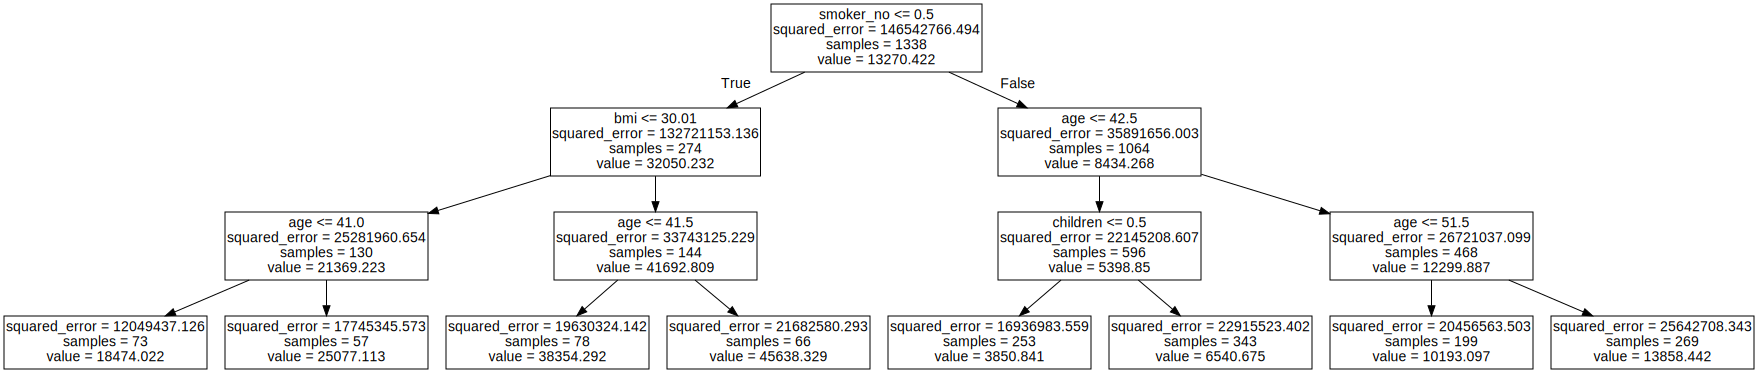

In [14]:
graphviz.Source(g)

> 위아래로 타이트하게 나오면서 스크롤로 볼 수 있게 된 모습, 애초에 `sklearn`에서 해당 사항을 우려해서 이렇게 만들어놓았다.

`-` 파일로 추출해서 저장하려면?

In [15]:
graphviz.Source(g).render('tree', format = 'pdf')  ## 파일명, 포맷

'tree.pdf'

> 작업공간에 파일이 추가된 것을 볼 수 있다.